# Install libraries

In [1]:
!pip install numpy pandas matplotlib tensorflow scikit-learn yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data using the ticker

In [3]:
# Download stock data
ticker = 'MRNA'  # Example: MRNA for Moderna
data = yf.download(ticker, start='2018-12-10', end='2024-10-03')

# Display the first few rows
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-10,18.900000,19.438999,18.000000,18.799999,18.799999,4233300
2018-12-11,20.549999,20.660000,17.990000,18.010000,18.010000,3435300
2018-12-12,18.549999,19.480000,18.020000,18.680000,18.680000,2590700
2018-12-13,19.250000,19.290001,18.680000,18.760000,18.760000,1608600
2018-12-14,18.750000,18.881001,18.250000,18.320000,18.320000,746300
...,...,...,...,...,...,...
2024-09-26,64.800003,65.070000,63.369999,63.930000,63.930000,4467700
2024-09-27,64.849998,66.879997,64.250000,65.750000,65.750000,4738600
2024-09-30,65.690002,67.959999,65.309998,66.830002,66.830002,4809900


# Preprocessing (Normalization)

In [4]:
# Use only the closing price
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [5]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set the time step (number of previous days to consider)
time_step = 60

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input data to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Structure the model

In [6]:
model = keras.Sequential()
model.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
import tensorflow as tf
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Training the model

In [8]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 62s 48ms/step - loss: 0.0047
Epoch 2/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 60s 29ms/step - loss: 0.0014
Epoch 3/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - loss: 0.0011
Epoch 4/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 8.8303e-04
Epoch 5/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - loss: 7.6065e-04
Epoch 6/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - loss: 6.9105e-04
Epoch 7/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 6.6326e-04
Epoch 8/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 6.5221e-04
Epoch 9/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 6.4400e-04
Epoch 10/10
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 6.3553e-04


# Make predictions

In [9]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get actual prices
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


# Visualization

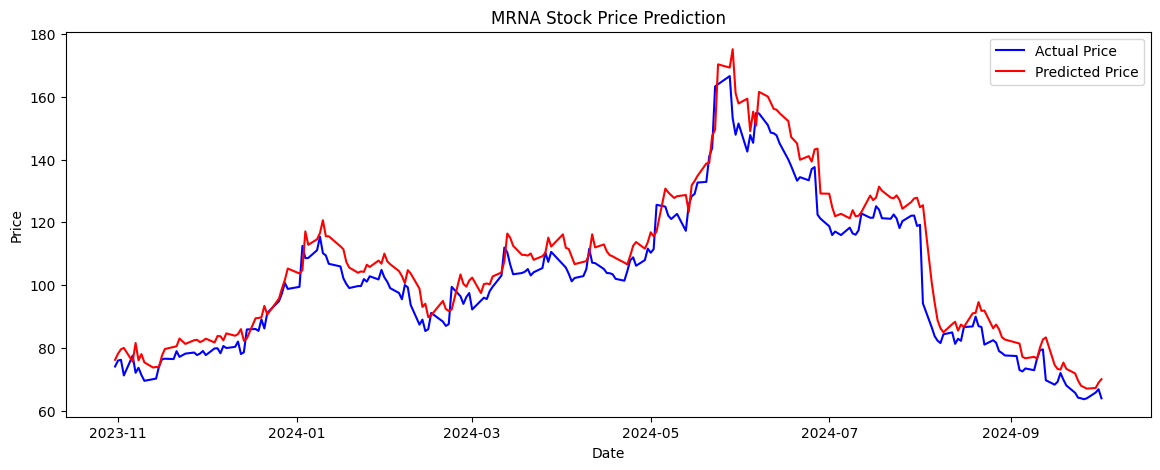

In [10]:
# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[train_size + time_step + 1:], y_test_actual, color='blue', label='Actual Price')
plt.plot(data.index[train_size + time_step + 1:], predictions, color='red', label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Compare actual and predicted stock prices

In [11]:
import pandas as pd

# Create a DataFrame to compare actual and predicted stock prices
comparison_df = pd.DataFrame({
    'Actual': y_test_actual.flatten(),  # Flatten to convert from 2D to 1D
    'Predicted': predictions.flatten()
})
(comparison_df.head())

comparison_df.to_csv('comparison_df.csv', index=False)  # index=False to avoid saving the index

# Evaluate the model

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate RMSE, MAE, R²
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Coefficient of Determination (R²): {r2}')

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R2'],
    'Value': [rmse, mae, r2]
})

# Save DataFrame to CSV
metrics_df.to_csv('performance_metrics.csv', index=False)

print("Performance metrics saved to 'performance_metrics.csv'")

Root Mean Squared Error: 6.735151508604572
Mean Absolute Error (MAE): 5.607117669335723
Coefficient of Determination (R²): 0.9152309953959855
Performance metrics saved to 'performance_metrics.csv'
